**Problem Statement:**

To understand user preferences and behavior on Netflix and provide recommendations to improve content offerings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!wget -O netflix.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"

--2023-12-11 09:04:11--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.46, 18.172.139.94, 18.172.139.210, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.08s   

2023-12-11 09:04:11 (38.8 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [4]:
df = pd.read_csv("netflix.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# 1. How may records are present?

In [7]:
df.shape

(8807, 12)

**Observation: There are 8807 records are present**

# Data Cleaning

# 2. How many percentage of null values are present in each column of the dataset?

In [8]:
round((df.isnull().sum()/df.shape[0])*100,2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

# 3. Dealing with missing values

**Since director and cast are the name of the people and it is categorical, it can replaced with unknown.**

In [9]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)


Replace the rating by its mode value

In [10]:
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

Fill the missing values in the date added column by 1st Jan and year as mode of the release year

In [11]:
df["date_added"] = df["date_added"].fillna("January 1, {}".format(str(df["release_year"].mode()[0])))

In [12]:
df[df.isnull().any(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Since the missing values in the duration is for movie type and it is categorical, it is replaced with the mode of the duration

In [13]:
df["duration"] = df["duration"].fillna(df[df["type"]=="Movie"]["duration"].mode()[0])

In [14]:
round((df.isnull().sum()/df.shape[0])*100,2)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [16]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,8807,4529,Unknown,2634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,8807,7693,Unknown,825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8807,749,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8807,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8807,17,TV-MA,3211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8807,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Percentage of Movies and Titles present in the dataset

In [17]:
df['type'].value_counts(normalize=True) * 100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

# 4. Unnest the column with values in comma into different records

In [18]:
df1 = df.copy()

In [19]:
df1['cast'] = df1['cast'].str.split(', ')

df1= df1.explode('cast')
df1['cast']

0                     Unknown
1                  Ama Qamata
1                 Khosi Ngema
1               Gail Mabalane
1              Thabang Molaba
                ...          
8806         Manish Chaudhary
8806             Meghna Malik
8806            Malkeet Rauni
8806           Anita Shabdish
8806    Chittaranjan Tripathy
Name: cast, Length: 64951, dtype: object

In [20]:
df1['listed_in'] = df1['listed_in'].str.split(', ')
df1 = df1.explode('listed_in')

How many rows and columns are there in the dataset after unnesting?

In [21]:
df1.shape

(149512, 12)

# 5. How many movies and TV shows directed by each director?

In [22]:
df['director'].value_counts()

Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

# 6. Number of movies and TV shows in each Genre

In [23]:
df1.groupby(["listed_in"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)

,listed_in,title
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


# 7. How many number of movies and TV shows are released related to comedy?

In [36]:
df1[df1["listed_in"].isin(['Comedies', 'TV Comedies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows'])]["title"].nunique()

2620

# 8. which year released movie / TV shows has been added to netfix?

In [ ]:
df_type = df.groupby('release_year')['type'].value_counts().unstack(level=-1)


<Axes: xlabel='release_year', ylabel='Movie'>

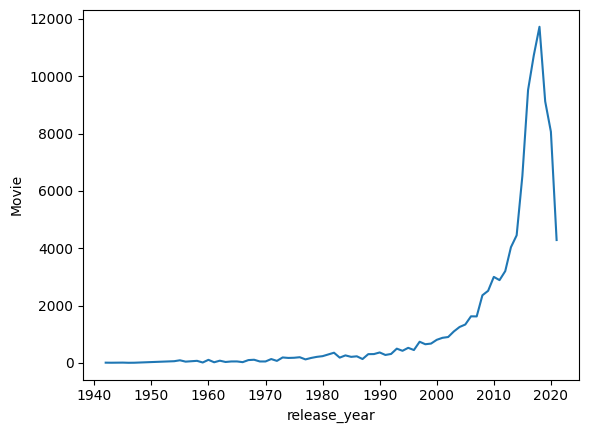

In [ ]:
sns.lineplot(x='release_year', y='Movie', data=df_type)

**Most of the movies in the netflix are from the year which released between 2010 and 2020**

<Axes: xlabel='release_year', ylabel='TV Show'>

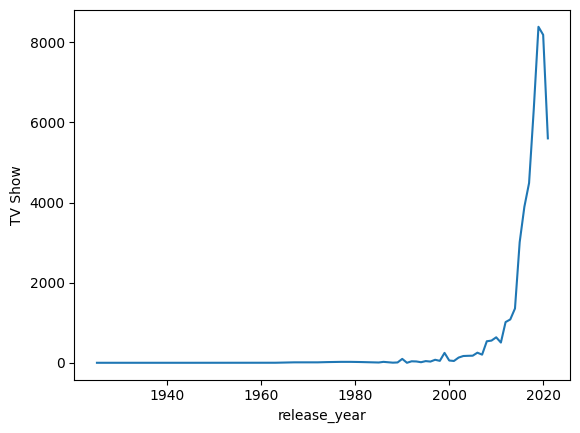

In [ ]:
sns.lineplot(x='release_year', y='TV Show', data=df_type)

**Most of the TV Shows in the netflix are from the year which released around 2020**

# 9. How movies and TV Shows are released each year?

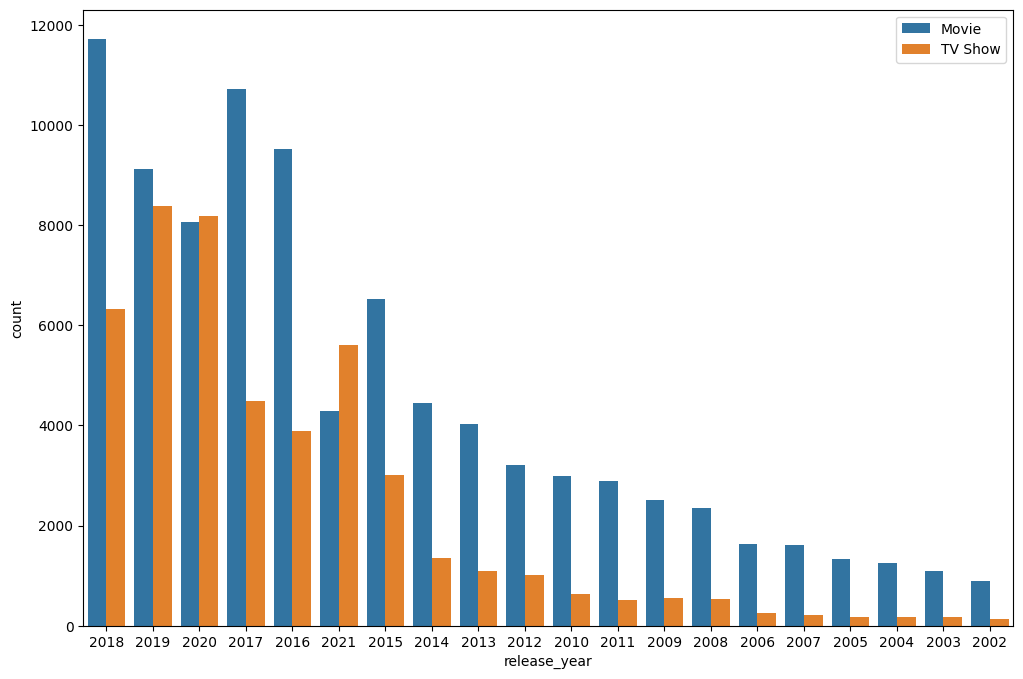

In [ ]:
plt.figure(figsize = (12,8))
cnt_plt = sns.countplot(x='release_year',data=df,hue='type', order =df['release_year'].value_counts().index[0:20])
cnt_plt.legend()

**It is observed that most movies are released than TV Shows.**

# 10. Which country has the highest number of movies and Tv shows?

In [ ]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

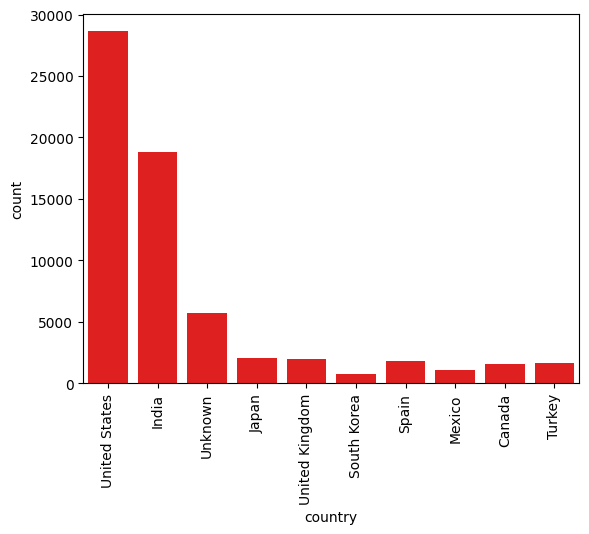

In [ ]:
sns.countplot(data=movie_df,x = 'country', order = df['country'].value_counts().index[:10],color = "red")
plt.xticks(rotation = 90)
plt.show()

**It is observed that highest number of movies are from United States which is around 28000 movies**

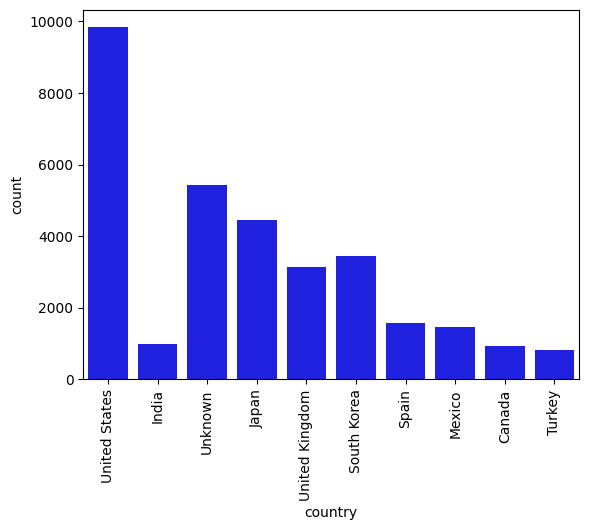

In [ ]:
sns.countplot(data=tv_df,x = 'country', order = df['country'].value_counts().index[:10],color = "blue")
plt.xticks(rotation = 90)
plt.show()

**It is observed that highest number of TV shows are from United States which is around 10000 movies**

# 11. What is the range of duration of Movies?

In [ ]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko Glenn,Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",James Marsden,Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Sofia Carson,Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [ ]:
movie_df['duration'] = movie_df['duration'].str.replace("min", " ").str.replace("Season", " ").str.strip()
movie_df['duration'] = movie_df['duration'].astype('int32')
duration_min = movie_df[movie_df['duration'] > 1]


<ipython-input-38-0944567ea3d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = movie_df['duration'].str.replace("min", " ").str.replace("Season", " ").str.strip()
<ipython-input-38-0944567ea3d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = movie_df['duration'].astype('int32')


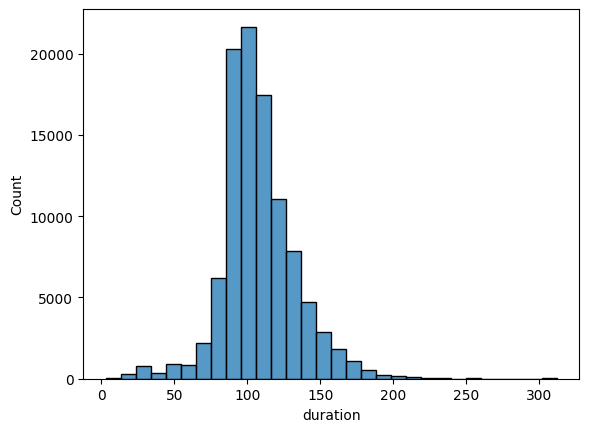

In [ ]:
sns.histplot(x= duration_min['duration'], data=movie_df, bins=30)
plt.show()

**It is observed that movies duration range is between 90-100 mins.**

# 12. What is the range of Season of TV shows?

In [ ]:
tv_df['duration'] = tv_df['duration'].str.replace("Seasons", " ").str.replace("Season", " ").str.strip()
tv_df['duration'] = tv_df['duration'].astype('int32')

<ipython-input-40-48ab5e075b8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['duration'] = tv_df['duration'].str.replace("Seasons", " ").str.replace("Season", " ").str.strip()
<ipython-input-40-48ab5e075b8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['duration'] = tv_df['duration'].astype('int32')


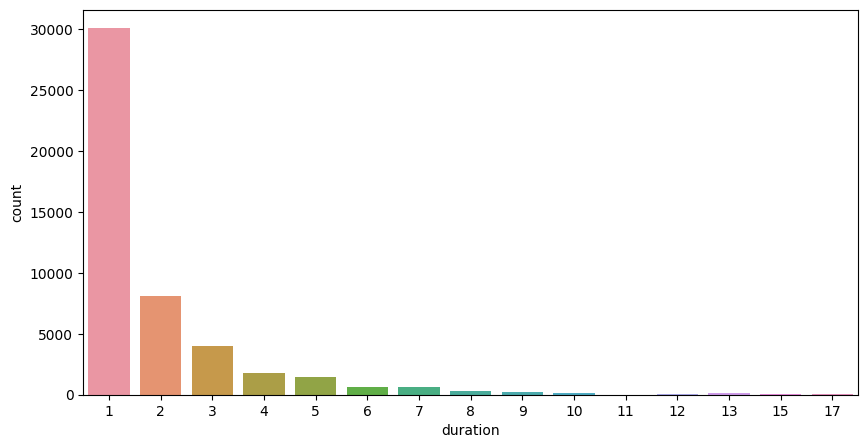

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x= tv_df['duration'], data=tv_df)
plt.show()

**It is observed that most tv-shows have 1 season**

# 13. What is the best week to launch a Movie ?

In [ ]:
movie_df['date_added'] = movie_df['date_added'].str.strip()
movie_df['date_added'] = pd.to_datetime(movie_df['date_added'], format='%B %d, %Y')
movie_df['week'] = movie_df['date_added'].dt.strftime('%U')

<ipython-input-42-3cc18d8ec652>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['date_added'] = movie_df['date_added'].str.strip()
<ipython-input-42-3cc18d8ec652>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['date_added'] = pd.to_datetime(movie_df['date_added'], format='%B %d, %Y')
<ipython-input-42-3cc18d8ec652>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

<Axes: xlabel='week', ylabel='count'>

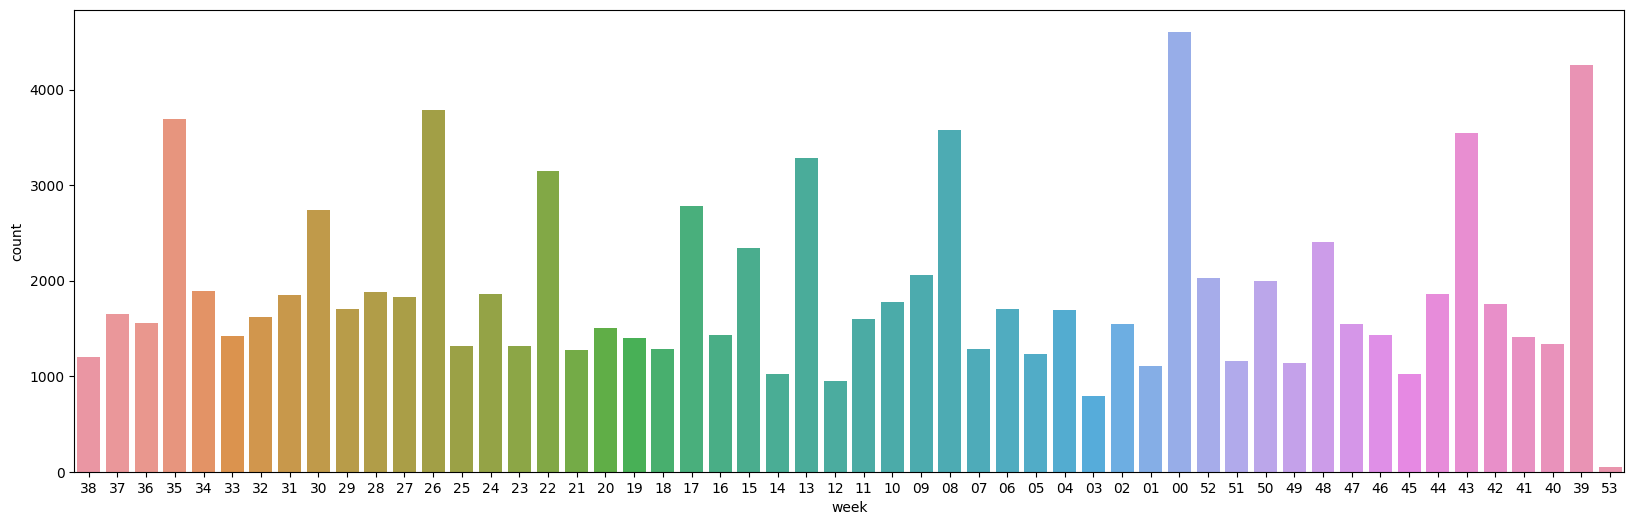

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data = movie_df,x = "week")

**The best week to launch the movie are week 35,26,22,13,8,43,39**

# 14. What is the best week to launch a TV show?



In [ ]:
tv_df['date_added'] = tv_df['date_added'].str.strip()
tv_df['date_added'] = pd.to_datetime(tv_df['date_added'], format='%B %d, %Y')
tv_df['week'] = tv_df['date_added'].dt.strftime('%U')

<ipython-input-44-25cf2c5e44aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['date_added'] = tv_df['date_added'].str.strip()
<ipython-input-44-25cf2c5e44aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['date_added'] = pd.to_datetime(tv_df['date_added'], format='%B %d, %Y')
<ipython-input-44-25cf2c5e44aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

<Axes: xlabel='week', ylabel='count'>

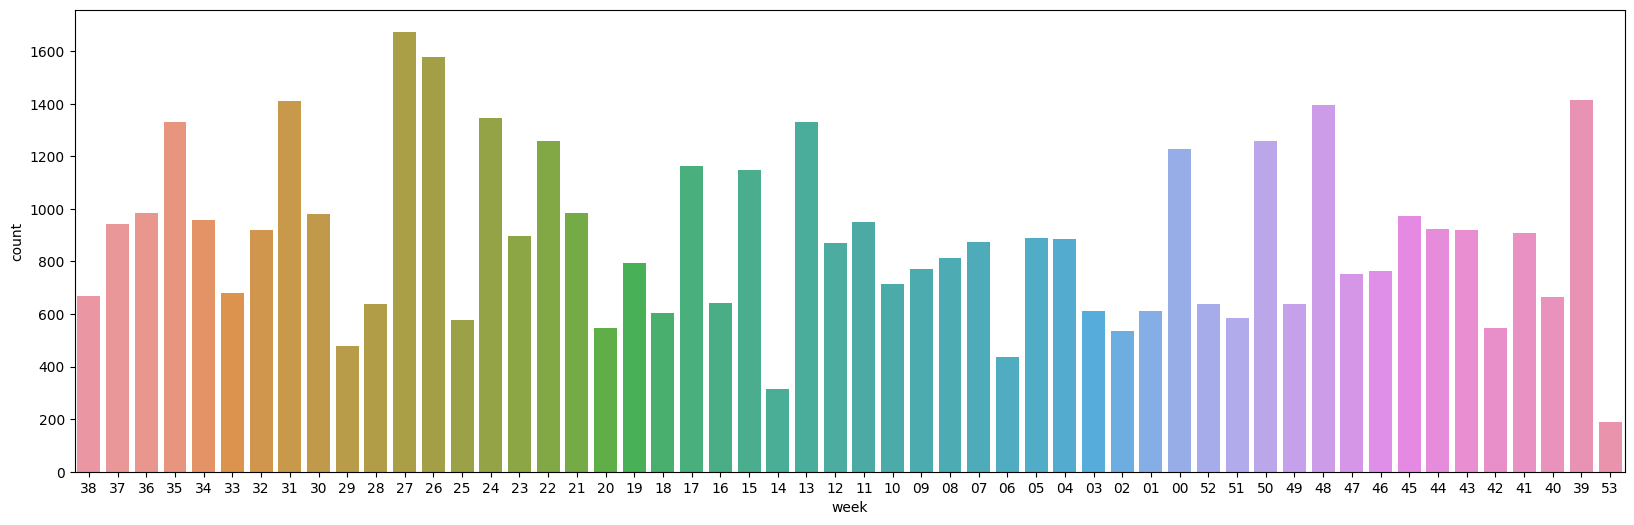

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data = tv_df,x = "week")

**The best week to launch the movie are week 27,26,31,35,13,48,50,39**

# 15. What is the best month to launch a Movie ?

In [ ]:
movie_df['month'] = movie_df['date_added'].dt.strftime('%B')

<ipython-input-46-5ea87ce70933>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['month'] = movie_df['date_added'].dt.strftime('%B')


<Axes: xlabel='month', ylabel='count'>

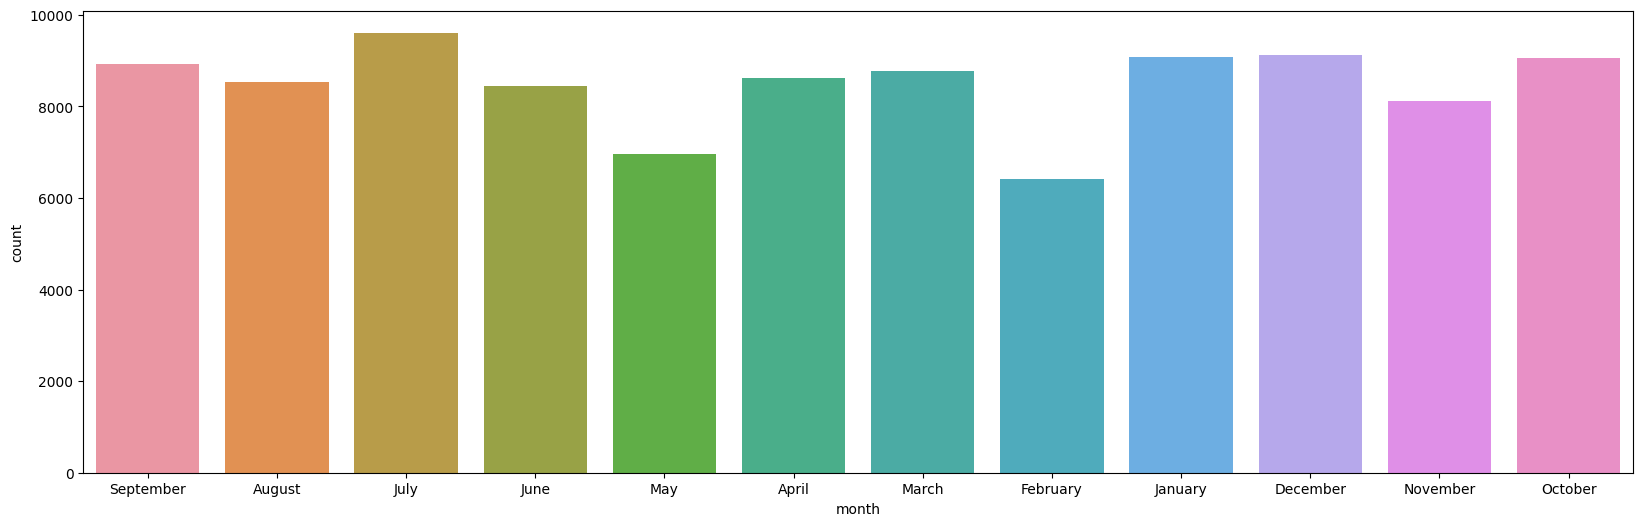

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data = movie_df,x = "month")

**It is observed that the best time to launch a movie is july month**

# 16. What is the best month to launch a TV show ?

In [ ]:
tv_df['month'] = tv_df['date_added'].dt.strftime('%B')

<ipython-input-48-39b023215518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['month'] = tv_df['date_added'].dt.strftime('%B')


<Axes: xlabel='month', ylabel='count'>

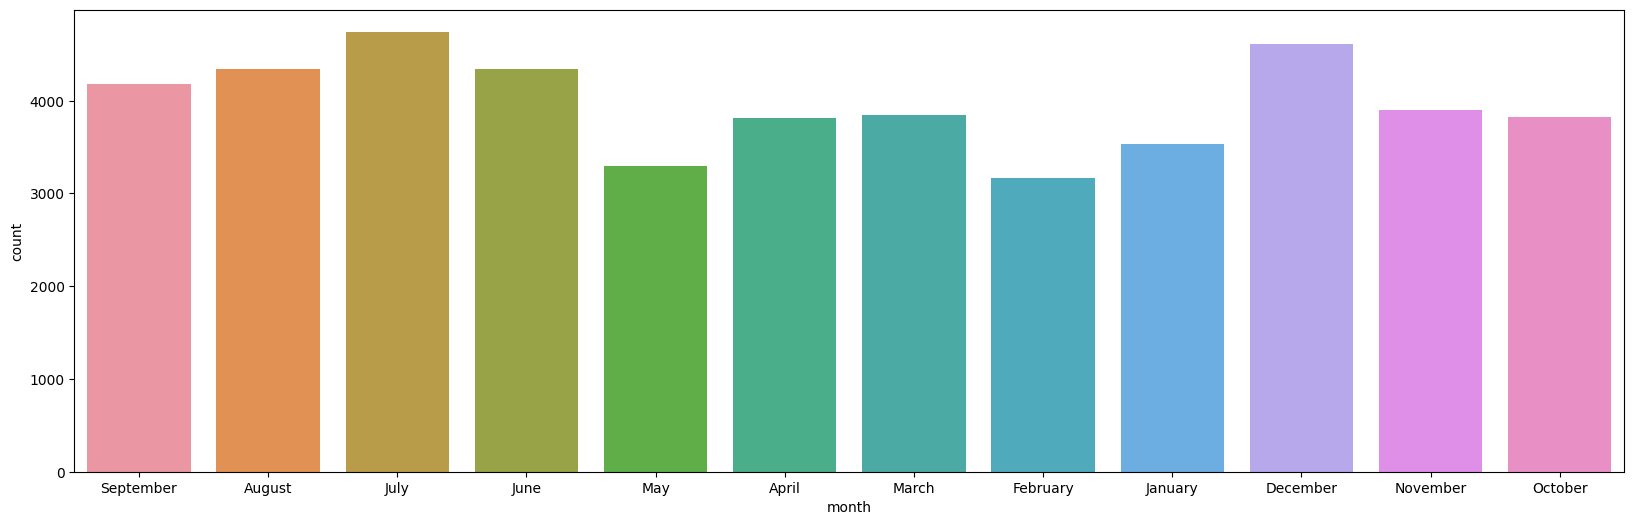

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data = tv_df,x = "month")

**The best month to launch tv show are july and december**

# 17. Top 10 actors who have appeared in most movies or TV shows

In [ ]:
actor_counts = df.groupby('cast')['title'].nunique().reset_index()
top_10_actors = actor_counts.sort_values(by='title', ascending=False).head(11)
top_10_actors

,cast,title
34170,Unknown,825
2826,Anupam Kher,43
30448,Shah Rukh Khan,35
16672,Julie Tejwani,33
32548,Takahiro Sakurai,32
24182,Naseeruddin Shah,32
28933,Rupa Bhimani,31
25388,Om Puri,30
846,Akshay Kumar,30
35835,Yuki Kaji,29


# 18. Top 10 directors who have appeared in most movies or TV shows

In [ ]:
director_counts = df.groupby('director')['title'].nunique().reset_index()
top_10_directors = director_counts.sort_values(by='title', ascending=False).head(11)
top_10_directors

,director,title
4301,Unknown,2621
3390,Rajiv Chilaka,19
3441,"Raúl Campos, Jan Suter",18
2596,Marcus Raboy,16
4044,Suhas Kadav,16
1789,Jay Karas,14
684,Cathy Garcia-Molina,13
2669,Martin Scorsese,12
4479,Youssef Chahine,12
1786,Jay Chapman,12


# 19. Which genre movies are more popular or produced more

In [ ]:
from wordcloud import WordCloud
genre_text = ' '.join(df['listed_in'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

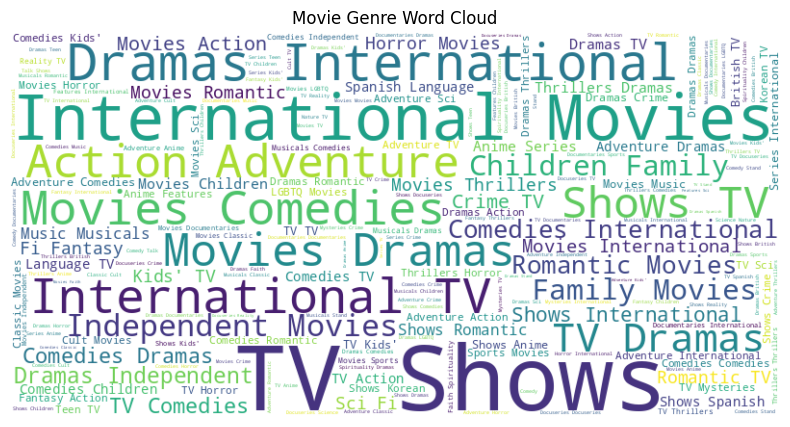

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Movie Genre Word Cloud")
plt.show()


# 20. Find After how many days the movie will be added to Netflix after the release of the movie

In [ ]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [ ]:
df['days_to_netflix'] = (df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days
df['days_to_netflix']

0        633
1        266
1        266
1        266
1        266
        ... 
8806    1521
8806    1521
8806    1521
8806    1521
8806    1521
Name: days_to_netflix, Length: 149284, dtype: int64

In [ ]:
mode_days = df['days_to_netflix'].mode().iloc[0]
mode_days

243

In [ ]:
print("The most common number of days after release to add to Netflix is:", mode_days, "days")

The most common number of days after release to add to Netflix is: 243 days


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,days_to_netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",633
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",266
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",266
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",266
1,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",266


# 21. Distribution of Release year in the Netflix Data

<ipython-input-59-1187ce6596ea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['release_year'], kde=False, bins=30, color='blue')


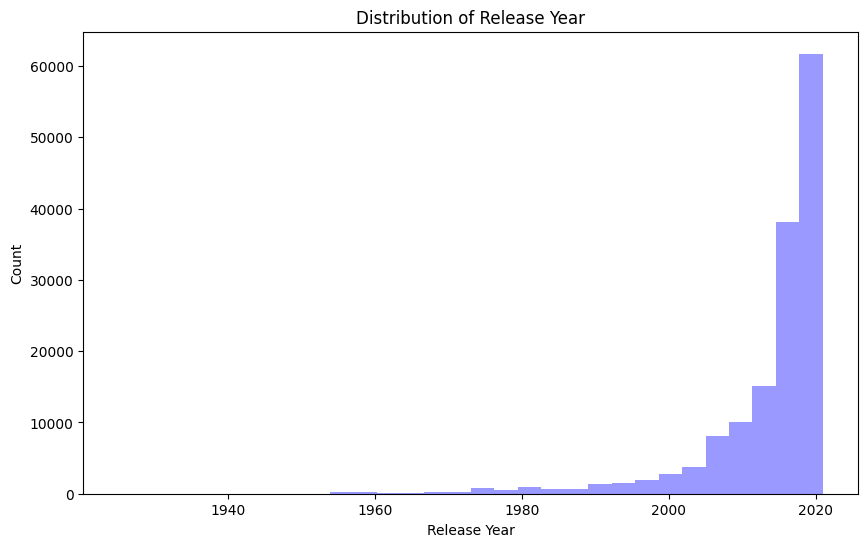

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['release_year'], kde=False, bins=30, color='blue')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

It is observed that most of the movies and TV shows are from the release year after 2010

# 22. Find the correlation among all the features

In [ ]:
correlation_matrix =df.corr()

<ipython-input-60-7370f059302e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =df.corr()


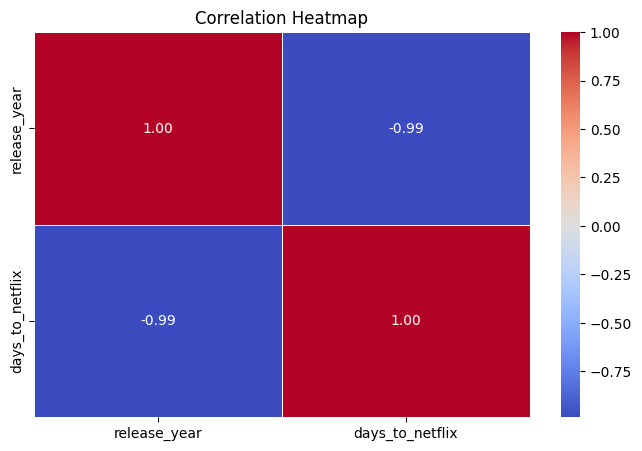

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* Correlation between number of days between the release date and when it was added to Netflix indicates a strong negative linear relationship between these two variables.

* When Release year increases (i.e., as movies get older), the 'day to Netflix' decreases significantly.

* In other words, newer movies tend to be added to Netflix more quickly after their release.

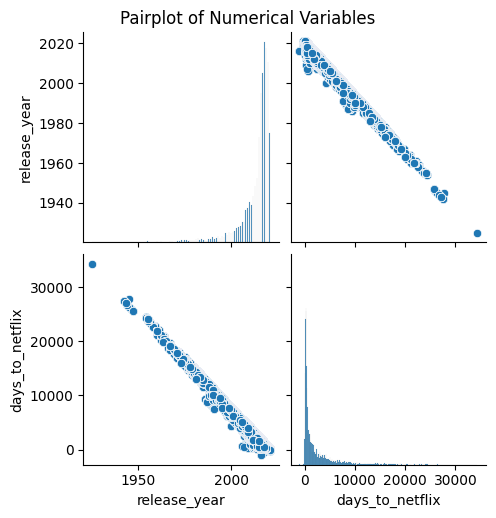

In [ ]:
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# 23. What are the types of rating mostly available to watch in netflix?

In [39]:
df.groupby("rating").agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)[:5]

,rating,title
11,TV-MA,3211
9,TV-14,2160
12,TV-PG,863
8,R,799
7,PG-13,490


# 24. Find out which actor or actress has starred in a maximum number of Netflix movies / Tv shows?

### Movies

In [50]:
df_cast = df1[df1["type"]=="Movie"].groupby("cast").agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_cast=df_cast[df_cast['cast']!='Unknown']
df_cast.head(10)

,cast,title
2105,Anupam Kher,42
21781,Shah Rukh Khan,35
17193,Naseeruddin Shah,32
18064,Om Puri,30
638,Akshay Kumar,30
18329,Paresh Rawal,28
12031,Julie Tejwani,28
1313,Amitabh Bachchan,28
20692,Rupa Bhimani,27
3354,Boman Irani,27


### TV shows

In [63]:
df_cast = df1[df1["type"]=="TV Show"].groupby("cast").agg({"title":"nunique"}).reset_index().sort_values(by="title",ascending = False)
df_cast = df_cast[df_cast["cast"]!="Unknown"]
df_cast.head(10)

,cast,title
13230,Takahiro Sakurai,25
14581,Yuki Kaji,19
6804,Junichi Suwabe,17
2874,Daisuke Ono,17
252,Ai Kayano,17
14565,Yuichi Nakamura,16
6761,Jun Fukuyama,15
14497,Yoshimasa Hosoya,15
3127,David Attenborough,14
14050,Vincent Tong,13


# 25. Find out which Directors are more popular in Netflix movies / Tv shows?

### Movies

In [78]:
df_director = df1[df1["type"]=="Movie"].groupby("director").agg({"title":"nunique"}).reset_index().sort_values(by="title",ascending = False)
df_director = df_director[df_director["director"]!="Unknown"]
df_director.head(10)

,director,title
3252,Rajiv Chilaka,19
3303,"Raúl Campos, Jan Suter",18
3885,Suhas Kadav,16
2492,Marcus Raboy,15
1716,Jay Karas,14
661,Cathy Garcia-Molina,13
4307,Youssef Chahine,12
2562,Martin Scorsese,12
1713,Jay Chapman,12
3862,Steven Spielberg,11


### TV Shows

In [77]:
df_director = df1[df1["type"]=="TV Show"].groupby("director").agg({"title":"nunique"}).reset_index().sort_values(by="title",ascending = False)
df_director = df_director[df_director["director"]!="Unknown"]
df_director.head(10)

,director,title
5,Alastair Fothergill,3
177,Rob Seidenglanz,2
187,Shin Won-ho,2
74,Iginio Straffi,2
72,Hsu Fu-chun,2
194,Stan Lathan,2
108,Ken Burns,2
160,Pali Yahya,1
151,"Norm Hiscock, Gary Howsam, Mike Smith, John Pa...",1
143,Mick Grogan,1


**Recommendation**

* We can focus on acquiring recent content post-2010, balancing it with classic titles.
* Movies from the United States and India can be added more due to popularity.
* We can Offer series with multiple seasons to engage users over a longer period since most of the TV series has one season.
* We can Enhance content recommendation algorithms for popular genres like Action, Adventure, Dramas, and Comedies.
* Encourage user interactions (ratings, reviews, watchlists) to improve recommendation accuracy and engagement.

               ************ THE END ***********